# Assignment 2: Checkpoint 1
This notebook cleans and explores an intial data analysis of my assigned 3 persons (2022484408, 4020332650 and 8877689391) from the dataset. To research my driving problem  of "how well do these people meet the recommendation of at least 30 minutes of moderate activity per day on weekends?" I requried and additional dataset from the source that would show intensity. For this reason an additional heartrate dataset was utilised. 

My initial predictions were that the merging of 2 datasets could poses a challenge due to time collection differences.

First thing to do is to import the required packages I will need. This being pandas for data manipulation and matplotlib to create charts. 

In [1]:
#importing requried packages for later use during data analysis
import pandas as pd
import matplotlib.pyplot as plt

Now that packages have been imported the next step is to import the required datasets that would assist in ansering the driving problem.

In [2]:
#import required datasets to look at duration of time and heartrate.
heartrate = pd.read_csv("heartrate_seconds_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")

#print the data to get an idea of how the table is structured.
heartrate.head()
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


From the table printed above, we can see that the time column is not in the data type that can be properly read by python. To fix this we'll use the pandas to_datetime() function to automatically adjust. This is preparation for analysis later on.

In [3]:
#ensure that the data is a dataframe for pandas to properly interpret
hourly_steps = pd.DataFrame(hourly_steps)

#convert the 'ActivityHour' column to datetime format
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

hourly_steps

,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0
...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514
22095,8877689391,2016-05-12 11:00:00,1407
22096,8877689391,2016-05-12 12:00:00,3135
22097,8877689391,2016-05-12 13:00:00,307


Now that the time for the hourly steps is adjusted the same should be performed on the heart rate data. But for the heart rate we need to match the time increments to that of hourly_steps. To do this the values of heart rates will be adjusted to show the average value over that 1 hour increment.

In [4]:
#convert the 'Time' column to datetime format
heartrate['Time'] = pd.to_datetime(heartrate['Time'])

#set the 'Time' column as the dataframe index
heartrate.set_index('Time', inplace=True)

#group by 'Id' and hourly periods, then calculate the average for each group
result = heartrate.groupby(['Id', pd.Grouper(freq='1H')]).mean().reset_index()

#turn it into a dataframe and print the result to view the changes
heartrate_data = pd.DataFrame(result)
heartrate_data

,Id,Time,Value
0,2022484408,2016-04-12 07:00:00,83.200000
1,2022484408,2016-04-12 08:00:00,68.562005
2,2022484408,2016-04-12 09:00:00,66.404700
3,2022484408,2016-04-12 10:00:00,106.716075
4,2022484408,2016-04-12 11:00:00,67.767157
...,...,...,...
6008,8877689391,2016-05-12 10:00:00,68.733503
6009,8877689391,2016-05-12 11:00:00,72.030108
6010,8877689391,2016-05-12 12:00:00,87.614719
6011,8877689391,2016-05-12 13:00:00,64.737705


Once the 2 dataset are prepared, we're able to merge them to create 1 table for easier analysis.

In [5]:
#merge dataframes based on 'Id' and time columns
merged_data = pd.merge(hourly_steps, heartrate_data, left_on=['Id', 'ActivityHour'], right_on=['Id', 'Time'], how='outer')

#ensure that is a dataframe for pandas to manipultate and print to view the new table
merged_data = pd.DataFrame(merged_data)
merged_data

,Id,ActivityHour,StepTotal,Time,Value
0,1503960366,2016-04-12 00:00:00,373.0,NaT,NaN
1,1503960366,2016-04-12 01:00:00,160.0,NaT,NaN
2,1503960366,2016-04-12 02:00:00,151.0,NaT,NaN
3,1503960366,2016-04-12 03:00:00,0.0,NaT,NaN
4,1503960366,2016-04-12 04:00:00,0.0,NaT,NaN
...,...,...,...,...,...
22101,4388161847,NaT,NaN,2016-05-12 15:00:00,56.037037
22102,4558609924,NaT,NaN,2016-05-12 16:00:00,75.093168
22103,5577150313,NaT,NaN,2016-05-11 12:00:00,65.200000
22104,6117666160,NaT,NaN,2016-05-09 12:00:00,94.130024


But as seen above, there are many empty datapoints that will create issues in later analysis. To resolve this we will only keep the data rows of users that have all data available.

In [6]:
#filter rows with all columns filled
filtered_data = merged_data.dropna()
filtered_data = pd.DataFrame(filtered_data)
filtered_data

,Id,ActivityHour,StepTotal,Time,Value
3635,2022484408,2016-04-12 07:00:00,847.0,2016-04-12 07:00:00,83.200000
3636,2022484408,2016-04-12 08:00:00,334.0,2016-04-12 08:00:00,68.562005
3637,2022484408,2016-04-12 09:00:00,243.0,2016-04-12 09:00:00,66.404700
3638,2022484408,2016-04-12 10:00:00,5243.0,2016-04-12 10:00:00,106.716075
3639,2022484408,2016-04-12 11:00:00,323.0,2016-04-12 11:00:00,67.767157
...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514.0,2016-05-12 10:00:00,68.733503
22095,8877689391,2016-05-12 11:00:00,1407.0,2016-05-12 11:00:00,72.030108
22096,8877689391,2016-05-12 12:00:00,3135.0,2016-05-12 12:00:00,87.614719
22097,8877689391,2016-05-12 13:00:00,307.0,2016-05-12 13:00:00,64.737705


Now that we have the filtered dataset, we can further filter it to the days that are weekends as the driving problem only focuses on weekends. This is done using dt.dayofweek function to filter saturdays and sundays.

In [7]:
# Filter rows where the day of the week is Saturday (5) or Sunday (6)
weekend_data = filtered_data[filtered_data['ActivityHour'].dt.dayofweek.isin([5, 6])]
weekend_data

,Id,ActivityHour,StepTotal,Time,Value
3731,2022484408,2016-04-16 07:00:00,126.0,2016-04-16 07:00:00,94.068182
3732,2022484408,2016-04-16 08:00:00,904.0,2016-04-16 08:00:00,90.695946
3733,2022484408,2016-04-16 09:00:00,4833.0,2016-04-16 09:00:00,102.178174
3734,2022484408,2016-04-16 10:00:00,732.0,2016-04-16 10:00:00,68.128668
3735,2022484408,2016-04-16 11:00:00,678.0,2016-04-16 11:00:00,67.912500
...,...,...,...,...,...
22005,8877689391,2016-05-08 17:00:00,1269.0,2016-05-08 17:00:00,80.840909
22006,8877689391,2016-05-08 18:00:00,1220.0,2016-05-08 18:00:00,73.065539
22007,8877689391,2016-05-08 19:00:00,243.0,2016-05-08 19:00:00,68.202532
22008,8877689391,2016-05-08 20:00:00,296.0,2016-05-08 20:00:00,68.313084


Once the data only includes the weekends the 3 users I am assigned to anaylse is filtered. This makes it so that I can purely focus on the 3 persons.

In [8]:
#make a list of assigned users
selected_id = [2022484408, 4020332650, 8877689391]

#filter data to only show selected id's
selected_data = weekend_data[weekend_data['Id'].isin(selected_id)]
selected_data

,Id,ActivityHour,StepTotal,Time,Value
3731,2022484408,2016-04-16 07:00:00,126.0,2016-04-16 07:00:00,94.068182
3732,2022484408,2016-04-16 08:00:00,904.0,2016-04-16 08:00:00,90.695946
3733,2022484408,2016-04-16 09:00:00,4833.0,2016-04-16 09:00:00,102.178174
3734,2022484408,2016-04-16 10:00:00,732.0,2016-04-16 10:00:00,68.128668
3735,2022484408,2016-04-16 11:00:00,678.0,2016-04-16 11:00:00,67.912500
...,...,...,...,...,...
22005,8877689391,2016-05-08 17:00:00,1269.0,2016-05-08 17:00:00,80.840909
22006,8877689391,2016-05-08 18:00:00,1220.0,2016-05-08 18:00:00,73.065539
22007,8877689391,2016-05-08 19:00:00,243.0,2016-05-08 19:00:00,68.202532
22008,8877689391,2016-05-08 20:00:00,296.0,2016-05-08 20:00:00,68.313084


Next we find the completeness of the data for each selected user. This will show the consistency of the user wearing the decive.

In [9]:
#extract the date part
filtered_data['Date'] = filtered_data['ActivityHour'].dt.date

#group by user ID and count unique dates
days_per_user = filtered_data.groupby('Id')['Date'].nunique()

days_per_user[selected_id]

Id
2022484408    31
4020332650    16
8877689391    31
Name: Date, dtype: int64

Next we find the average step count per day, maximum step count, and minimum step count for each user I was assigned.

In [10]:
#filter the dataframe to only include selected IDs
selected_data = filtered_data[filtered_data['Id'].isin(selected_id)]

#group by user ID, then aggregate to compute average, max, and min step counts across all days
overall_stats_per_user = selected_data.groupby('Id')['StepTotal'].agg(['mean', 'max', 'min']).reset_index()

print(overall_stats_per_user)

           Id        mean      max  min
0  2022484408  874.893035   5596.0  0.0
1  4020332650  299.723684   2737.0  0.0
2  8877689391  991.246000  10554.0  0.0


Now that the dataset is clean to how we want it a simple line graph can be created using matplotlib to visually show the heart rates across the users over the weekends.

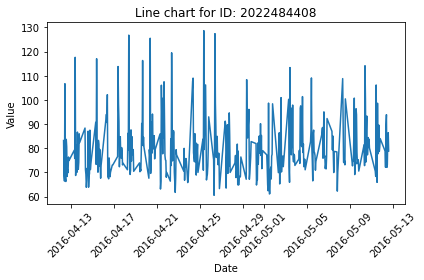

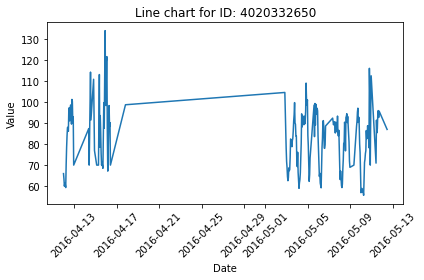

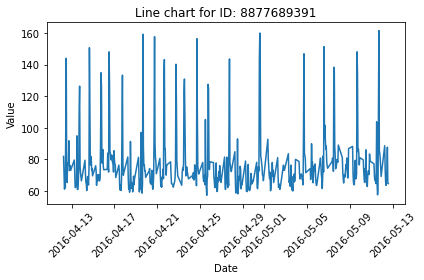

In [11]:
for user_id in selected_id:
    user_data = selected_data[selected_data['Id'] == user_id]
    plt.figure()  # Create a new figure
    plt.plot(user_data['ActivityHour'], user_data['Value']) 
    plt.title(f"Line chart for ID: {user_id}")
    plt.xlabel("Date")
    plt.ylabel("Value")  # Adjust this if you change the metric
    plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
    plt.tight_layout()
    
plt.show()

From the graphs we are able to determine whether the user had any moderate or high intensity movement on the day at all. However 1 user has inconsistent data collection and is missing data for the center dates.